In [1]:
import xlrd

In [7]:
file = xlrd.open_workbook('/Users/yushaoze/Desktop/GDP.xlsx')

In [8]:
file

In [11]:
print("表格#：", file.nsheets)
print("表格名称：", file.sheet_names())

表格#： 1
表格名称： ['国内生产总值(季)']


In [12]:
sheet1 = file.sheet_by_index(0)

In [19]:
for i in range(sheet1.ncols):
    print("Name: ", sheet1.cell(0,i).value)

Name:  指标名称
Name:  GDP:初步核算数:当季同比
Name:  GDP:初步核算数:当季同比
Name:  M2:同比
Name:  社会融资规模:当月值
Name:  CPI:当月同比
Name:  CPI:食品:当月同比
Name:  CPI:非食品:当月同比
Name:  CPI:不包括食品和能源(核心CPI):当月同比
Name:  PPI:全部工业品:当月同比


In [20]:
sheet1.ncols

10

In [159]:
cpi = sheet1.col_values(5)[3:-2]
cpi_food = sheet1.col_values(6)[3:-2]
cpi_non_food = sheet1.col_values(7)[3:-2]
ppi = sheet1.col_values(9)[3:]
m2 = sheet1.col_values(3)[3:-2]
time_x = sheet1.col_values(0)[3:-2]
gdp = sheet1.col_values(2)[3:-2]
gdp[0] = 0.

In [152]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [142]:
#M2
x = []
for i in range(len(m2)):
    x.append(i)
    
for m in range(len(m2)):
    m2[m] = float(m2[m])
    gdp[m] = float(gdp[m])

<function matplotlib.pyplot.show(*args, **kw)>

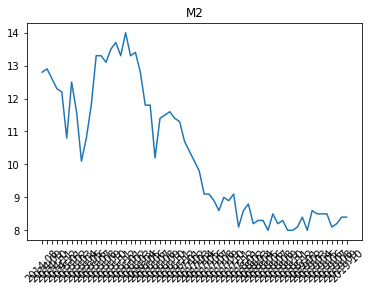

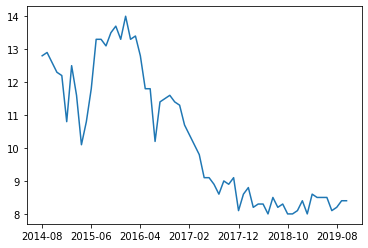

In [143]:
plt.plot(time_x, m2);
plt.title('M2')
plt.xticks(rotation = 45);
#横坐标过于密集
tick_spacing = 10
fig, ax = plt.subplots(1, 1);
ax.plot(time_x, m2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.show

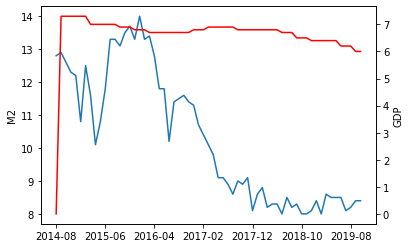

In [144]:
#M2 & GDP
tick_spacing = 10
fig, ax1 = plt.subplots()
ax1.plot(time_x, m2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.set_ylabel('M2')
ax2 = ax1.twinx()
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.plot(time_x, gdp, c = 'r')
ax2.set_ylabel('GDP')
plt.show()

没有太大意义， 因为比的是名义值和速率，需要修改

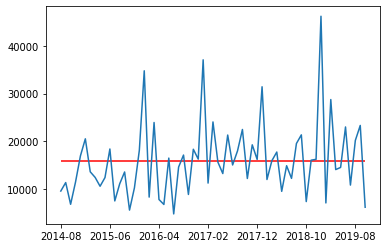

In [158]:
#社融
sr = sheet1.col_values(4)[3:-2]
fig, ax = plt.subplots(1, 1)
tick_spacing = 10
ax.plot(time_x, sr)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.hlines(np.mean(sr), time_x[0], time_x[-1], color = 'r')


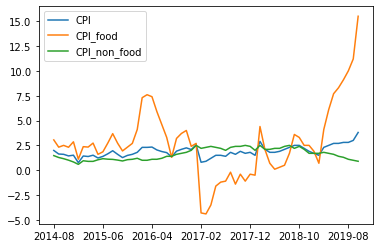

In [175]:
#CPI
fig, ax1 = plt.subplots()
tick_spacing = 10
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.plot(time_x, cpi, time_x, cpi_food, time_x, cpi_non_food)

plt.legend(labels = ['CPI', 'CPI_food', 'CPI_non_food'])
